In [396]:
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [397]:

from sklearn.datasets import load_breast_cancer

ds = load_breast_cancer()

print(ds.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [398]:
X = ds.data[:,0:2]
y = ds.target

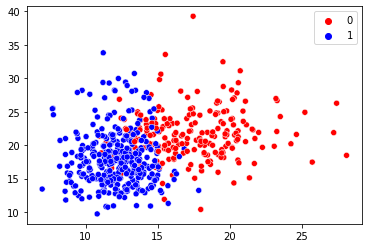

In [399]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=['red', 'blue']);

## LogisticRegression

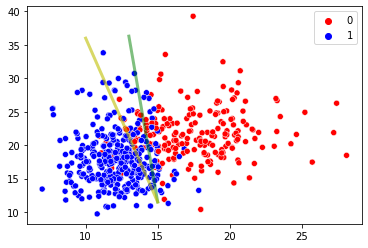

In [426]:
import numpy as np
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=['red', 'blue']);
u= np.linspace(13, 15, 50)
u1=np.linspace(10, 15, 50)
v=np.linspace(35, 10, 50)+u*0.1
v1=np.linspace(35, 10, 50)+u1*0.1
plt.plot(u,v,color='green',linewidth=3,alpha=0.5)
plt.plot(u1,v1,color='y',linewidth=3, alpha=0.6)
#sns.scatterplot(x='variance', y='skewness', hue='class', data=ds.sample(500));

In [401]:
from sklearn.metrics import accuracy_score
y_pred_1=np.linspace(35, 10, 50)+u*0.1-u<0
y_true_1 = v<0
Lgr=accuracy_score(y_true_1, y_pred_1)
y_pred_2=np.linspace(35, 10, 50)+u1*0.1-u1<0
y_true_1 = v1<0
Lyr=accuracy_score(y_true_1, y_pred_1)
print("Точность для зеленой прямой:",Lgr)
print("Точность для желтой прямой:",Lyr)

Точность для зеленой прямой: 0.86
Точность для желтой прямой: 0.86


In [402]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=False)
model.fit(x.reshape(-1,1),y)

LinearRegression(fit_intercept=False)

In [403]:
D=model.coef_
print(D)

[0.02877946]


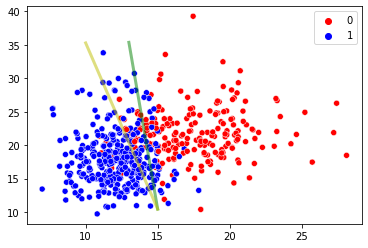

In [404]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=['red', 'blue']);
plt.plot(u,np.linspace(35, 10, 50)+u*D,color='green',linewidth=3,alpha=0.5)
plt.plot(u1,np.linspace(35, 10, 50)+u1*D,color='y',linewidth=3,alpha=0.5)

# Доля верных ответов

In [405]:
from sklearn.metrics import accuracy_score
y_pred_1=np.linspace(35, 10, 50)+u*D-u<0
y_true_1 = v<0
Lgr=accuracy_score(y_true_1, y_pred_1)
y_pred_2=np.linspace(35, 10, 50)+u1*D-u1<0
y_true_1 = v1<0
Lyr=accuracy_score(y_true_1, y_pred_1)
print("Точность для зеленой прямой:",Lgr)
print("Точность для желтой прямой:",Lyr)

Точность для зеленой прямой: 0.82
Точность для желтой прямой: 0.82


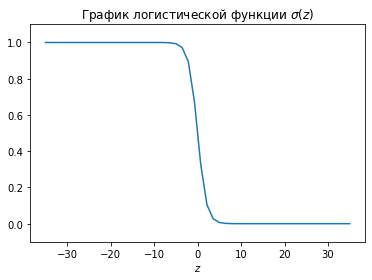

In [406]:
t = np.linspace(-35, 35, 50)
sigma = 1/(1+np.exp(t))
plt.plot(t, sigma)
plt.ylim(-0.1, 1.1)
plt.xlabel('$z$')
plt.title('График логистической функции $\sigma(z)$');

In [417]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(C=1e+10)
model.fit(x.reshape(-1,1),y)
S=model.coef_
print(S)

[[-0.23464078]]


In [418]:
print(D,' ',S)

[0.02877946]   [[-0.23464078]]


In [409]:
y_pas=np.linspace(35, 10, 50)+u*D
m=y_pas>0
n=y_pas<0

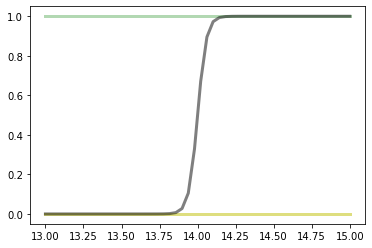

In [410]:
plt.plot(u,m,color='green',linewidth=3,alpha=0.3)
plt.plot(u,n,color='y',linewidth=3,alpha=0.5)
sigm= lambda t:np.exp(t)/(1+np.exp(t))
plt.plot(u,sigm(t),color='k',linewidth=3,alpha=0.5)

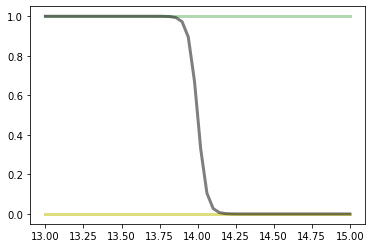

In [413]:
plt.plot(u,m,color='green',linewidth=3,alpha=0.3)
plt.plot(u,n,color='y',linewidth=3,alpha=0.5)
sigm= lambda t:np.exp(-t)/(1+np.exp(-t))
plt.plot(u,sigm(t),color='k',linewidth=3,alpha=0.5)

In [427]:
from sklearn.model_selection import train_test_split
X_tr,X_test,Y_tr,Y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Метод соседей KNN

In [438]:
from sklearn.neighbors import KNeighborsClassifier

In [479]:
kNN = KNeighborsClassifier(n_neighbors=5) 
kNN.fit(X_tr, Y_tr)

KNeighborsClassifier()

In [480]:
kNN.predict(X_test)

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [481]:
y_pred=kNN.predict(X_test)

In [483]:
len(X_tr)

398

In [484]:
len(X_test)

171

## Оценка алгоритма KNN

In [482]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[ 49  14]
 [  7 101]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        63
           1       0.88      0.94      0.91       108

    accuracy                           0.88       171
   macro avg       0.88      0.86      0.86       171
weighted avg       0.88      0.88      0.88       171



In [497]:
kNN = KNeighborsClassifier(n_neighbors=1) 
kNN.fit(X_tr, Y_tr)

KNeighborsClassifier(n_neighbors=1)

In [498]:
y_pred=kNN.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[52 11]
 [ 9 99]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        63
           1       0.90      0.92      0.91       108

    accuracy                           0.88       171
   macro avg       0.88      0.87      0.87       171
weighted avg       0.88      0.88      0.88       171



_Из наблюдений_: 171 запись обработана на 88%

## Сравнение частоты ошибок со значением K

In [505]:
error = []
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_tr, Y_tr)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Сред ошибка')

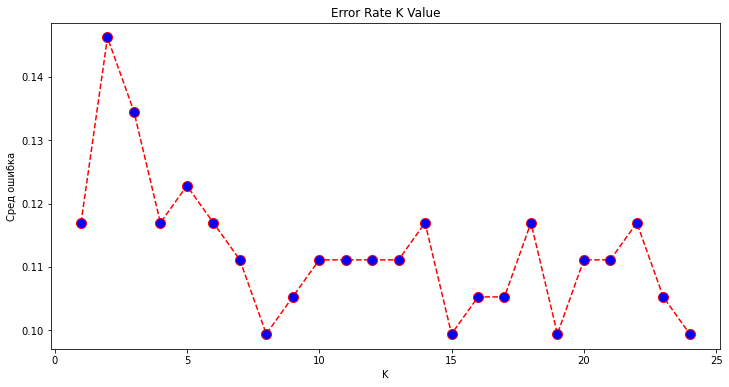

In [506]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 25), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K')
plt.ylabel('Сред ошибка')

In [502]:
kNN = KNeighborsClassifier(n_neighbors=15) 
kNN.fit(X_tr, Y_tr)
y_pred=kNN.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))


[[ 51  12]
 [  5 103]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        63
           1       0.90      0.95      0.92       108

    accuracy                           0.90       171
   macro avg       0.90      0.88      0.89       171
weighted avg       0.90      0.90      0.90       171

